In [7]:
%matplotlib inline

import sys
PATH = '/Users/gaetanoantonicchio/Documents/GitHub/DataMining-2'
sys.path.insert(0, PATH) 
from fma_metadata import utils

# Basic libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import style

import random
from sklearn import preprocessing
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.preprocessing import StandardScaler

# Regression Libraries
import statsmodels.api as sm
from termcolor import colored as cl
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error




import warnings
warnings.filterwarnings('ignore')

## A) Import and Merge Dataset

In [8]:
echonest = utils.load("/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/echonest.csv")
tracks = utils.load("/Users/gaetanoantonicchio/Desktop/dataset_DM2/fma_metadata/tracks.csv")

In [9]:
echo_genres = echonest['echonest','audio_features'].merge(tracks['track'][['genre_top']],on='track_id')
echo_genres.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence,genre_top
track_id,,,,,,,,,
2,0.416675,0.675894,0.634476,0.010628,0.177647,0.159310,165.922,0.576661,Hip-Hop
3,0.374408,0.528643,0.817461,0.001851,0.105880,0.461818,126.957,0.269240,Hip-Hop
5,0.043567,0.745566,0.701470,0.000697,0.373143,0.124595,100.260,0.621661,Hip-Hop
10,0.951670,0.658179,0.924525,0.965427,0.115474,0.032985,111.562,0.963590,Pop
134,0.452217,0.513238,0.560410,0.019443,0.096567,0.525519,114.290,0.894072,Hip-Hop


In [10]:
echo_genres['genre_top'].value_counts()

Rock                   3892
Electronic             2170
Hip-Hop                 910
Folk                    874
Old-Time / Historic     357
Pop                     346
Classical               265
Jazz                    241
International           133
Instrumental             84
Blues                    66
Experimental             17
Country                   0
Easy Listening            0
Soul-RnB                  0
Spoken                    0
Name: genre_top, dtype: int64

## B) Anomaly Detection
Execute Isolation forest on all echonest dataset

In [12]:
def echo_outliers_detector(gen): 
    echo = echo_genres[echo_genres['genre_top'].isin([gen])]
    genre = echo['genre_top']
    echo.drop('genre_top',axis=1,inplace=True)
    
    # transform data in an np.ndarray 
    X = np.array(echo)
    
    #isolation-forest sklearn version
    F0 = IsolationForest(random_state=42, n_estimators=300, contamination=0.02).fit(X) 
    
    # score isolation forest - sklearn
    outliers_sk = F0.predict(X)
    
    # IsolationForest Sklearn
    echo['outlier_IF_sklearn'] = outliers_sk
    echo['outlier_IF_sklearn'] = echo['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')
    
    # sklearn IF
    print(f"**** Anomaly detected for {gen}  *****'")
    print(echo['outlier_IF_sklearn'].value_counts())
    print()
    
    echo = echo[echo['outlier_IF_sklearn'] == 'inlier']
    echo.drop('outlier_IF_sklearn',axis=1,inplace=True)
    return echo

In [14]:
# Echonest genres anomaly free (without outlier_IF_sklearn and genre_top column)
echo_rock=echo_outliers_detector('Rock')
echo_electro=echo_outliers_detector('Electronic')
echo_hh=echo_outliers_detector('Hip-Hop')
echo_folk=echo_outliers_detector('Folk')
echo_old=echo_outliers_detector('Old-Time / Historic')
echo_pop=echo_outliers_detector('Pop')
echo_classic=echo_outliers_detector('Classical')
echo_jazz=echo_outliers_detector('Jazz')

**** Anomaly detected for Rock  *****'
inlier     3814
outlier      78
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Electronic  *****'
inlier     2126
outlier      44
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Hip-Hop  *****'
inlier     891
outlier     19
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Folk  *****'
inlier     856
outlier     18
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Old-Time / Historic  *****'
inlier     349
outlier      8
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Pop  *****'
inlier     339
outlier      7
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Classical  *****'
inlier     259
outlier      6
Name: outlier_IF_sklearn, dtype: int64

**** Anomaly detected for Jazz  *****'
inlier     236
outlier      5
Name: outlier_IF_sklearn, dtype: int64



## C) Linear Relationships
#### Echonest Correlations
Make a echonest sub-selection for each genre. In particular, we've selected genres that occours the most. For each echo_genre dataset we search some positive or negative linear relationship between echonest features.

#### Rock

Text(0.5, 1, 'Correlation Matrix Echonest Rock')

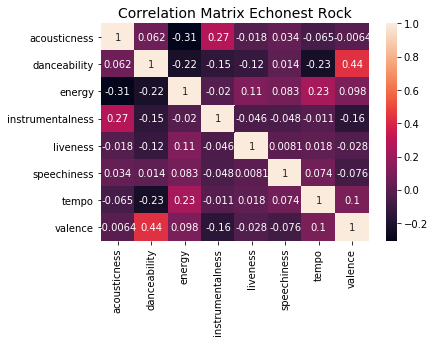

In [15]:
#Check Rock correlation
sns.heatmap(echo_rock.corr(),annot=True)
plt.title("Correlation Matrix Echonest Rock", fontsize=14)

#### Electronic

Text(0.5, 1, 'Correlation Matrix Echonest Electronic')

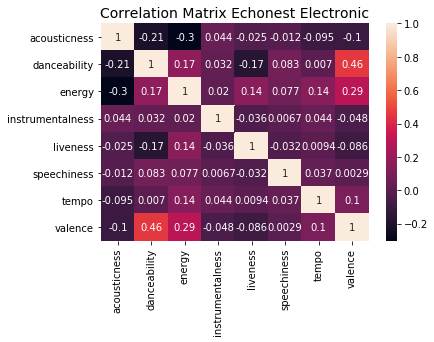

In [16]:
#Check Electronic correlation
sns.heatmap(echo_electro.corr(),annot=True)
plt.title("Correlation Matrix Echonest Electronic", fontsize=14)

#### Hip-Hop

Text(0.5, 1, 'Correlation Matrix Echonest Hip-Hop')

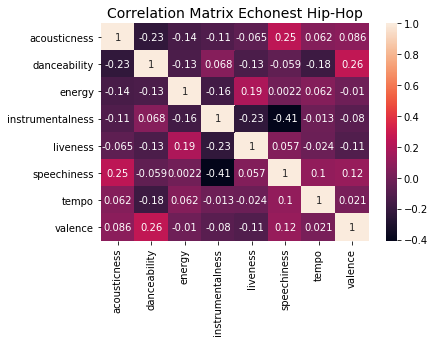

In [17]:
#Check Hip-Hop correlation
sns.heatmap(echo_hh.corr(),annot=True)
plt.title("Correlation Matrix Echonest Hip-Hop", fontsize=14)

#### Folk

Text(0.5, 1.0, 'Correlation Matrix Echonest Folk')

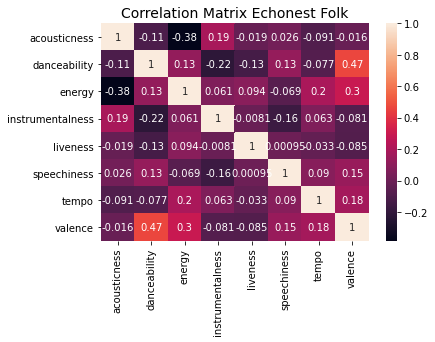

In [11]:
#Check Folk correlation
sns.heatmap(echo_folk.corr(),annot=True)
plt.title("Correlation Matrix Echonest Folk", fontsize=14)

#### Old Time / Historic

Text(0.5, 1.0, 'Correlation Matrix Echonest Old-Time/Historical')

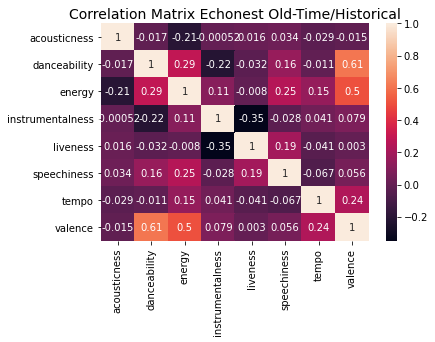

In [12]:
#Check Old-Time / Historic correlation
sns.heatmap(echo_old.corr(),annot=True)
plt.title("Correlation Matrix Echonest Old-Time/Historical", fontsize=14)

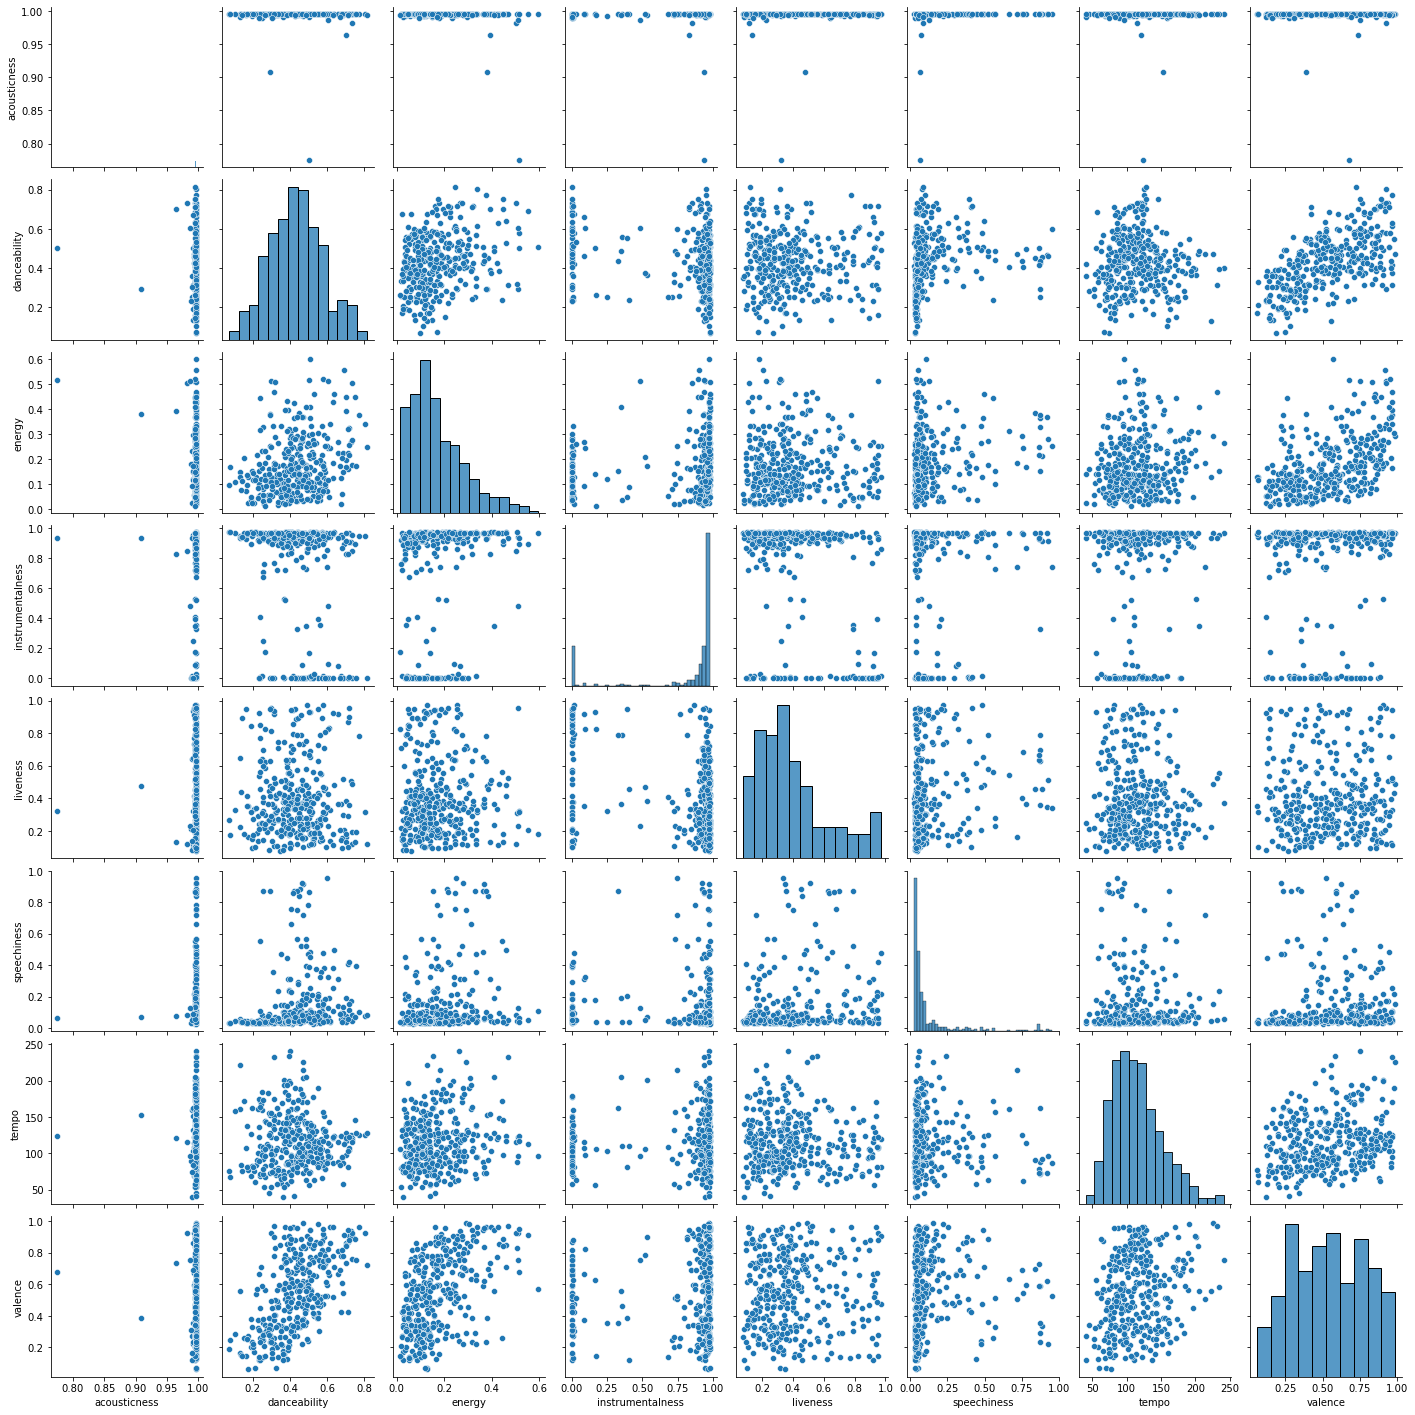

In [13]:
sns.pairplot(echo_old)

<AxesSubplot:xlabel='valence', ylabel='danceability'>

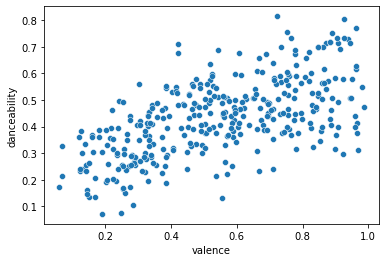

In [14]:
# Best correlation with dependent variable valence and danceability with genre selected
sns.scatterplot(data=echo_old, y='danceability', x="valence")

#### Pop

Text(0.5, 1.0, 'Correlation Matrix Echonest Pop')

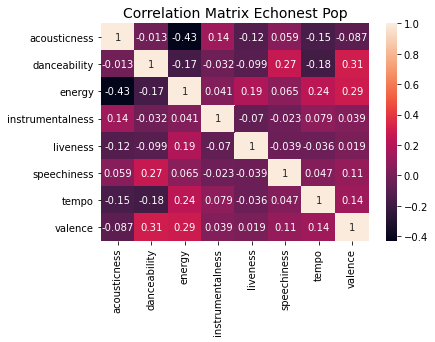

In [15]:
#Check Pop correlation
sns.heatmap(echo_pop.corr(),annot=True)
plt.title("Correlation Matrix Echonest Pop", fontsize=14)

#### Classical

Text(0.5, 1, 'Correlation Matrix Echonest Classical')

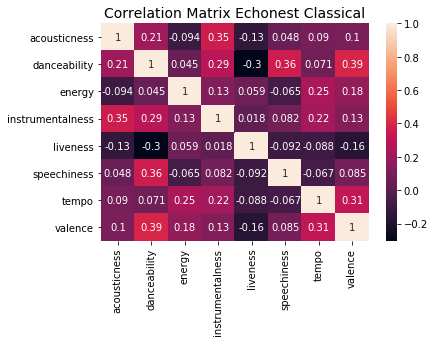

In [18]:
#Check Classical correlation
sns.heatmap(echo_classic.corr(),annot=True)
plt.title("Correlation Matrix Echonest Classical", fontsize=14)

#### Jazz

Text(0.5, 1.0, 'Correlation Matrix Echonest Jazz')

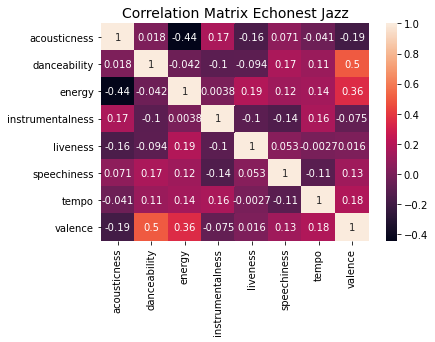

In [17]:
#Check Jazz correlation
sns.heatmap(echo_jazz.corr(),annot=True)
plt.title("Correlation Matrix Echonest Jazz", fontsize=14)

## D) Simple Linear Regression 
in this case we've one independent variable and a dependent variable

In [19]:
# echonest genre selected for regression
ECHO_GENRE = echo_classic 
GENRE = 'Classical'

# continuous dependent variable
DEP_VAR = 'danceability'

# continuous independent variable
INDEP_VAR_1 = 'valence'

#others continuous independent variables (MLR)'
INDEP_VAR_2 = 'liveness'
INDEP_VAR_3 = 'instrumentalness'
INDEP_VAR_4 = 'acousticness'
INDEP_VAR_5 = 'speechiness'

In [20]:
ECHO_GENRE.head()

,acousticness,danceability,energy,instrumentalness,liveness,speechiness,tempo,valence
track_id,,,,,,,,
4850,0.995629,0.371476,0.019513,0.818853,0.125051,0.037130,86.979,0.100547
4851,0.995218,0.280483,0.003559,0.944435,0.088230,0.039156,51.516,0.040038
10026,0.995275,0.430044,0.072676,0.935900,0.125192,0.042109,119.927,0.189312
10027,0.995468,0.298026,0.010502,0.924716,0.063657,0.049051,65.035,0.127662
10028,0.995772,0.384196,0.071317,0.939621,0.098120,0.035904,99.524,0.400982


In [31]:
ECHO_GENRE_ = ECHO_GENRE[[INDEP_VAR_1, DEP_VAR]]

In [32]:
#isolation-forest sklearn version
F0 = IsolationForest(random_state=42, n_estimators=500, contamination=0.02).fit(ECHO_GENRE_) 
    
    # score isolation forest - sklearn
outliers_sk = F0.predict(ECHO_GENRE_)
    
    # IsolationForest Sklearn
ECHO_GENRE_['outlier_IF_sklearn'] = outliers_sk
ECHO_GENRE_['outlier_IF_sklearn'] = ECHO_GENRE_['outlier_IF_sklearn'].apply(lambda x: 'inlier' if x==1 else 'outlier')
    
    # sklearn IF
print(ECHO_GENRE_['outlier_IF_sklearn'].value_counts())
print()
    
ECHO_GENRE_ = ECHO_GENRE_[ECHO_GENRE_['outlier_IF_sklearn'] == 'inlier']
ECHO_GENRE_

inlier     253
outlier      6
Name: outlier_IF_sklearn, dtype: int64



,valence,danceability,outlier_IF_sklearn
track_id,,,
4850,0.100547,0.371476,inlier
4851,0.040038,0.280483,inlier
10026,0.189312,0.430044,inlier
10027,0.127662,0.298026,inlier
10028,0.400982,0.384196,inlier
...,...,...,...
65792,0.158826,0.159672,inlier
65793,0.514599,0.551281,inlier
65794,0.050648,0.350558,inlier


### D.1) Best Linear Relationship
The best correlation we found is 0.61: between x=valence y=danceability in echonest old / historical genre.
P(danceability|valence). In general, we saw that for each genre danceability and valence are well correlated.

Text(0.5, 0, 'valence')

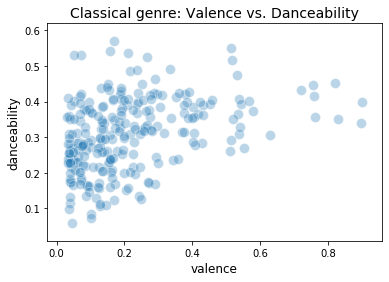

In [35]:
plt.scatter(y = DEP_VAR, x = INDEP_VAR_1, data = ECHO_GENRE_, s = 100, alpha = 0.3, edgecolor = 'white')
plt.title(GENRE+' genre: Valence vs. Danceability', fontsize = 14)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)

### D.2) Attributes
To build a Simple Linear Regression (SLR) model, we must have an independent variable and a dependent variable. For our SLR model, we are going to take Valence as the independent variable and Danceability as the dependent variable.

In [78]:
# independent variable
X_var = ECHO_GENRE_[[INDEP_VAR_1]]

#dependent variable
y_var = ECHO_GENRE_[[DEP_VAR]]

In [79]:
# split data in development and internal test
X, X_test, y, y_test = train_test_split(X_var, y_var, test_size=0.30 ,random_state=42)

### D.3) SLR model with Statsmodels
In this case we build a simple linear regression model which use statsmodel

In [80]:
# Ordinary Least Square
slr_model = sm.OLS(y_var,X_var)
slr_reg = slr_model.fit()

In [81]:
print( cl( slr_reg.summary(),attrs = ['bold']) )

                                 OLS Regression Results                                
Dep. Variable:           danceability   R-squared (uncentered):                   0.657
Model:                            OLS   Adj. R-squared (uncentered):              0.656
Method:                 Least Squares   F-statistic:                              482.9
Date:                Sun, 11 Apr 2021   Prob (F-statistic):                    1.67e-60
Time:                        15:23:03   Log-Likelihood:                          61.669
No. Observations:                 253   AIC:                                     -121.3
Df Residuals:                     252   BIC:                                     -117.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### D.4) SLR model with Scikit-learn

In [82]:
#Function to get cross validation score R2
def get_cv_scores(model,X_train,y_train):
    scores = cross_val_score(model,
                             X_train,
                             y_train,
                             cv=3,
                             scoring='r2')
    
    print('CV Mean (R2): ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [83]:
# build the model
slr = LinearRegression()
slr.fit(X,y)
y_pred = slr.predict(X_test)

In [84]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(slr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.039900866874968965
STD:  0.07033496347392895


***Scores (no cv) on Test Data***
R2: 0.141
MSE: 0.009
MAE: 0.072


In [85]:
# Compute hypotesis weight and bias

# Y = wX+B where X=valence and Y=danceability
slr_slope = slr.coef_ # weight: w
slr_intercept = slr.intercept_ # bias B
print('Coefficients: \n', slr_slope)
print('Intercept: \n', slr_intercept)

Coefficients: 
 [[0.21210727]]
Intercept: 
 [0.26146521]


Text(0.5, 0, 'valence')

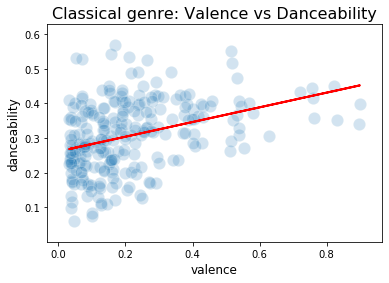

In [86]:
# plot the regression function
sns.scatterplot(x = INDEP_VAR_1, y = DEP_VAR, data = ECHO_GENRE_ , s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(ECHO_GENRE_[INDEP_VAR_1], slr_slope*ECHO_GENRE_[[INDEP_VAR_1]] + slr_intercept, color = 'r', linewidth = 2)
plt.title(GENRE+' genre: Valence vs Danceability', fontsize = 16)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)

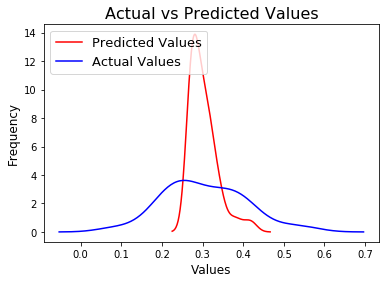

In [87]:
# I valori compresi tra 0.3 e 0.55 vengono predetti più volte di quanto realmente appaiono nella distribuzione.

# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### D.5) Lasso Simple Linear Regression (L1 Regularization) 

#### D.5.1) Evaluation with no alpha optimization

In [88]:
lasso_slr = Lasso(alpha=0.001)
lasso_slr.fit(X,y)
y_pred = lasso_slr.predict(X_test)

In [89]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(lasso_slr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.06059608767533031
STD:  0.049178743173103244


***Scores (no cv) on Test Data***
R2: 0.134
MSE: 0.009
MAE: 0.073


In [90]:
lasso_slr_slope = lasso_slr.coef_ 
lasso_slr_intercept = lasso_slr.intercept_ 
print('Coefficients: \n', lasso_slr.coef_)
print('Intercept: \n', lasso_slr.intercept_)

Coefficients: 
 [0.18089708]
Intercept: 
 [0.26843655]


Text(0.5, 0, 'valence')

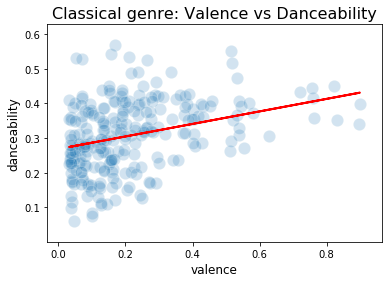

In [91]:
# plot the regression function
sns.scatterplot(x = INDEP_VAR_1, y = DEP_VAR, data = ECHO_GENRE_, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(ECHO_GENRE_[INDEP_VAR_1], lasso_slr_slope*ECHO_GENRE_[[INDEP_VAR_1]] + lasso_slr_intercept, color = 'r', linewidth = 2)
plt.title(GENRE+' genre: Valence vs Danceability', fontsize = 16)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)


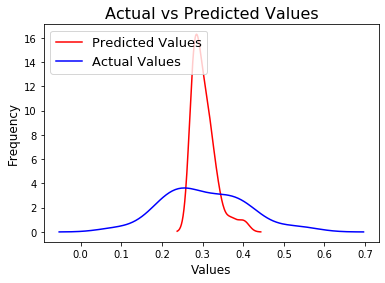

In [92]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

#### D.5.2)  Evaluation with alpha optimization
We've used fine RandomSearch to find the optimal alpha value

In [93]:
alpha = [0.1, 0.01,0.001,0.0001,0.00001,0.000001,0.0000001]
param_grid = dict(alpha=alpha)

In [103]:
lasso_slr = Lasso()
grid = RandomizedSearchCV(estimator=lasso_slr, param_distributions=param_grid, n_iter=30, cv = 3, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X, y)

Fitting 3 folds for each of 30 candidates, totalling 90 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  90 out of  90 | elapsed:    0.7s finished


In [104]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.07262071080616732
Best Params:  {'alpha': 0.002298272436657752}


#### Retrain the lasso regression with optimal value of alpha

In [58]:
lasso_slr = Lasso(alpha=0.00011189)
lasso_slr.fit(X,y)
y_pred = lasso_slr.predict(X_test)

In [59]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(lasso_slr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.05511588343473702
STD:  0.16731674717429892


***Scores (no cv) on Test Data***
R2: 0.122
MSE: 0.009
MAE: 0.072


In [60]:
lasso_slr_slope = lasso_slr.coef_ 
lasso_slr_intercept = lasso_slr.intercept_ 
print('Coefficients: \n', lasso_slr.coef_)
print('Intercept: \n', lasso_slr.intercept_)

Coefficients: 
 [0.23288105]
Intercept: 
 [0.25640794]


Text(0.5, 0, 'valence')

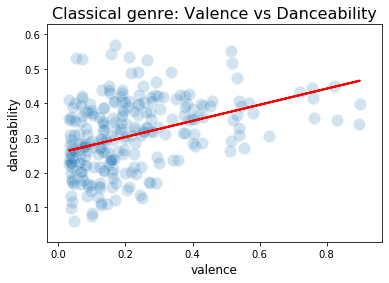

In [61]:
# plot the regression function
sns.scatterplot(x = INDEP_VAR_1, y = DEP_VAR, data = ECHO_GENRE_, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(ECHO_GENRE_[INDEP_VAR_1], lasso_slr_slope*ECHO_GENRE_[[INDEP_VAR_1]] + lasso_slr_intercept, color = 'r', linewidth = 2)
plt.title(GENRE+' genre: Valence vs Danceability', fontsize = 16)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)


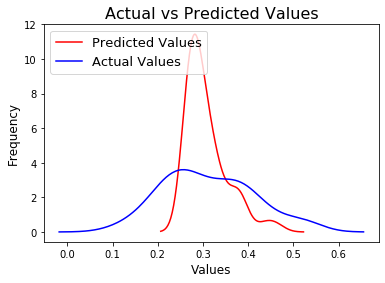

In [62]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### D.6) Ridge Simple Linear Regression (L2 Regularization)

#### D.6.1) Evaluation with no alpha optimization

In [67]:
ridge_slr = Ridge(alpha=0.0001)
ridge_slr.fit(X,y)
y_pred = ridge_slr.predict(X_test)

In [68]:
#Evaluations without grid search
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(ridge_slr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.054939200347364214
STD:  0.16972722682198946


***Scores (no cv) on Test Data***
R2: 0.120
MSE: 0.009
MAE: 0.072


In [69]:
ridge_slr_slope = ridge_slr.coef_ 
ridge_slr_intercept = ridge_slr.intercept_
print('Coefficients: \n', ridge_slr.coef_)
print('Intercept: \n', ridge_slr.intercept_)

Coefficients: 
 [[0.23699842]]
Intercept: 
 [0.25553874]


Text(0.5, 0, 'valence')

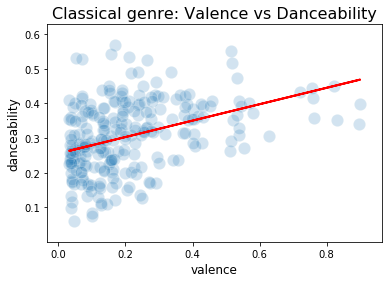

In [71]:
# plot the regression function
sns.scatterplot(x = INDEP_VAR_1, y = DEP_VAR, data = ECHO_GENRE_, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(ECHO_GENRE_[INDEP_VAR_1], ridge_slr_slope*ECHO_GENRE_[[INDEP_VAR_1]] + ridge_slr_intercept, color = 'r', linewidth = 2)
plt.title(GENRE+' genre: Valence vs Danceability', fontsize = 16)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)


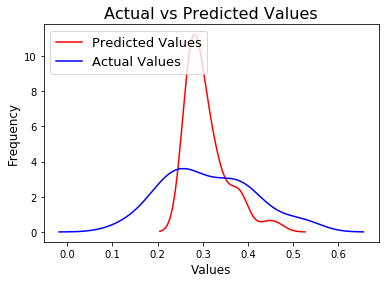

In [72]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

#### D.6.2) Evaluation optimizing alpha value
We've used GridSearch to find the optimal alpha value

In [73]:
# find optimal alpha with grid search
alpha = [random.uniform(1e-6,1e-1) for x in range(100000)]
param_grid = dict(alpha=alpha)

In [74]:
ridge_slr = Ridge()
grid = RandomizedSearchCV(estimator=ridge_slr, param_distributions=param_grid, n_iter=500, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 152 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 1352 tasks      | elapsed:    6.3s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:   11.0s finished


In [75]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.10865363014260913
Best Params:  {'alpha': 0.09992628957722599}


#### Retrain ridge regression with optimal value of alpha

In [76]:
ridge_slr = Ridge(alpha=0.0998279967452989)
ridge_slr.fit(X,y)
y_pred = ridge_slr.predict(X_test)

In [77]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(ridge_slr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.057985413587055556
STD:  0.1621163203933556


***Scores (no cv) on Test Data***
R2: 0.122
MSE: 0.009
MAE: 0.072


In [64]:
ridge_slr_slope = ridge_slr.coef_ 
ridge_slr_intercept = ridge_slr.intercept_
print('Coefficients: \n', ridge_slr.coef_)
print('Intercept: \n', ridge_slr.intercept_)

Coefficients: 
 [[0.1999204]]
Intercept: 
 [0.25988894]


Text(0.5, 0, 'valence')

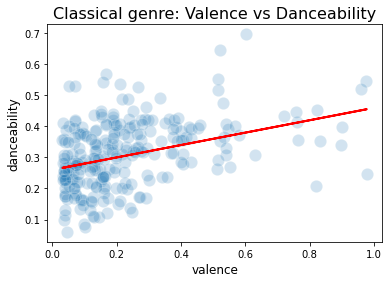

In [65]:
# plot the regression function
sns.scatterplot(x = INDEP_VAR_1, y = DEP_VAR, data = ECHO_GENRE, s = 150, alpha = 0.2, edgecolor = 'white')
plt.plot(ECHO_GENRE[INDEP_VAR_1], ridge_slr_slope*ECHO_GENRE[[INDEP_VAR_1]] + ridge_slr_intercept, color = 'r', linewidth = 2)
plt.title(GENRE+' genre: Valence vs Danceability', fontsize = 16)
plt.ylabel(DEP_VAR, fontsize = 12)
plt.xlabel(INDEP_VAR_1, fontsize = 12)


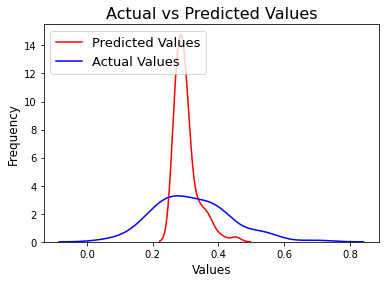

In [66]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

## E) Multivariate Linear Regression: MLR
In this case we have more than one independent variable and a dependent variable. 

### E.1) Attributes
To build a Multivariate Linear Regression (MLR) model, we selected two indipendents variables which the higher correlation with danceability (always in historical genre). Its are Energy and Valence, rispectivetly 0.32 and 0.62.

In [67]:
# independent variables
X_var = ECHO_GENRE[[INDEP_VAR_1,INDEP_VAR_2,INDEP_VAR_3,INDEP_VAR_4,INDEP_VAR_5]]

#dependent variable
y_var = ECHO_GENRE[[DEP_VAR]]

In [68]:
# split data in development and internal test
X, X_test, y, y_test = train_test_split(X_var, y_var, test_size=0.30 ,random_state=0)

### E.2) MLR simple model

In [69]:
# build the model (same as before)
mlr = LinearRegression()
mlr.fit(X,y)
y_pred = mlr.predict(X_test)

In [70]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(mlr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.19839589886949735
STD:  0.08996913043496313


***Scores (no cv) on Test Data***
R2: 0.342
MSE: 0.009
MAE: 0.071


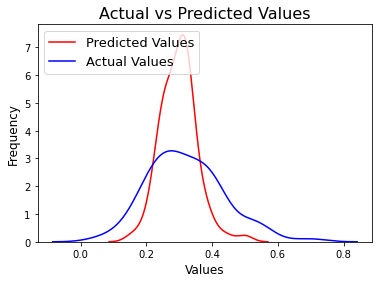

In [71]:
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### E.3) Lasso MLR model: (L1 Regularization)
##### Evaluation with alpha optimization
We've used GridSearch to find the optimal alpha value

In [87]:
# find optimal alpha with grid search
alpha = [random.uniform(1e-6,1) for x in range(100000)]
param_grid = dict(alpha=alpha)

In [88]:
lasso_mlr = Lasso()
grid = RandomizedSearchCV(estimator=lasso_mlr, param_distributions=param_grid, n_iter=500, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.7s finished


In [89]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.20225539240985774
Best Params:  {'alpha': 0.0006382997192634848}


#### Retrain lasso MLR with optimal value of alpha

In [90]:
lasso_mlr = Lasso(alpha=0.0006382997192634848)
lasso_mlr.fit(X,y)
y_pred = lasso_mlr.predict(X_test)

In [91]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(lasso_mlr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.22297676135742908
STD:  0.12743745351308905


***Scores (no cv) on Test Data***
R2: 0.297
MSE: 0.009
MAE: 0.074


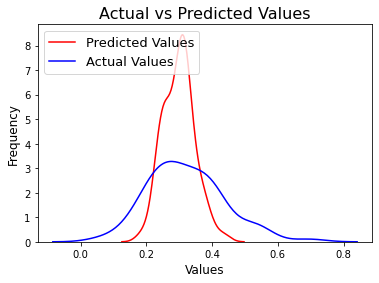

In [92]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)

### E.4) Ridge MLR model: (L2 Regularization)
#### E.4.1) Evaluation with alpha optimization
We've used GridSearch to find the optimal alpha value

In [93]:
# find optimal alpha with grid search
alpha = [random.uniform(1e-6,1) for x in range(100000)]
param_grid = dict(alpha=alpha)

In [94]:
ridge_mlr = Ridge()
grid = RandomizedSearchCV(estimator=ridge_mlr, param_distributions=param_grid, n_iter=500, scoring='r2', verbose=1, n_jobs=-1)
grid_result = grid.fit(X, y)

Fitting 5 folds for each of 500 candidates, totalling 2500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 2160 tasks      | elapsed:    3.9s
[Parallel(n_jobs=-1)]: Done 2500 out of 2500 | elapsed:    4.4s finished


In [95]:
print('Best Score: ', grid_result.best_score_)
print('Best Params: ', grid_result.best_params_)

Best Score:  0.2400567765283217
Best Params:  {'alpha': 0.0375620425311536}


#### Retrain ridge MLR with optimal value of alpha

In [96]:
ridge_mlr = Ridge(alpha=0.0375620425311536)
ridge_mlr.fit(X,y)
y_pred = ridge_mlr.predict(X_test)

In [97]:
#Evaluations
print("***Cross Validation R2 score - Test Data***")
get_cv_scores(ridge_mlr,X_test,y_test) #R2 cv on training data

print("***Scores (no cv) on Test Data***")
print('R2: %.3f' % r2_score(y_test, y_pred))
print('MSE: %.3f' % mean_squared_error(y_test, y_pred))
print('MAE: %.3f' % mean_absolute_error(y_test, y_pred))

***Cross Validation R2 score - Test Data***
CV Mean (R2):  0.2500973862882982
STD:  0.17576296369591385


***Scores (no cv) on Test Data***
R2: 0.337
MSE: 0.009
MAE: 0.071


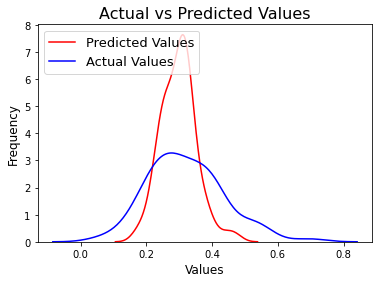

In [99]:
# Plot frequency of predicted and actual values
sns.distplot(y_pred, hist = False, color = 'r', label = 'Predicted Values')
sns.distplot(y_test, hist = False, color = 'b', label = 'Actual Values')
plt.title('Actual vs Predicted Values', fontsize = 16)
plt.xlabel('Values', fontsize = 12)
plt.ylabel('Frequency', fontsize = 12)
plt.legend(loc = 'upper left', fontsize = 13)